C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


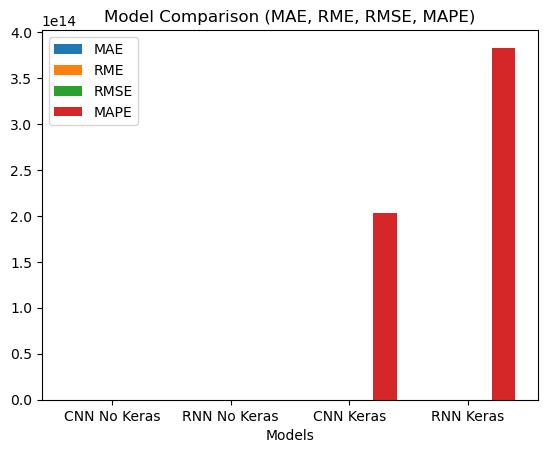

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import tkinter as tk
from tkinter import messagebox

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)                # Age of students (18-30 years old)
hours_of_study = np.random.randint(1, 10, size=n_samples)       # Hours of study per week (1-10 hours)
previous_scores = np.random.randint(50, 100, size=n_samples)    # Average previous test scores (50-100)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)  # Pass/Fail (0 or 1)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

# 2. Define input and output
X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model without Keras (TensorFlow only)
def cnn_model_without_keras(X_train, y_train, X_test):
    X_cnn_train = X_train.reshape(-1, 1, 3, 1)  # reshape for CNN
    X_cnn_test = X_test.reshape(-1, 1, 3, 1)

    cnn_weights = {
        'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),
        'dense': tf.Variable(tf.random.normal([16 * 2, 1]))
    }
    cnn_biases = {
        'conv1': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def cnn_forward(X):
        conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1, 1, 1, 1], padding='VALID')
        conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
        conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
        dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_cnn = tf.optimizers.Adam()
    loss_fn_cnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = cnn_forward(X_cnn_train)
            loss_value = loss_fn_cnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
        optimizer_cnn.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

    y_pred_cnn = cnn_forward(X_cnn_test).numpy().flatten()
    return np.round(y_pred_cnn)

# RNN Model without Keras (TensorFlow only)
def rnn_model_without_keras(X_train, y_train, X_test):
    X_rnn_train = X_train.reshape(-1, 3, 1)
    X_rnn_test = X_test.reshape(-1, 3, 1)

    rnn_weights = {
        'rnn': tf.Variable(tf.random.normal([1, 16])),
        'dense': tf.Variable(tf.random.normal([16, 1]))
    }
    rnn_biases = {
        'rnn': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def rnn_forward(X):
        rnn_outputs = []
        for t in range(3):
            rnn_input = X[:, t, :] @ rnn_weights['rnn'] + rnn_biases['rnn']
            rnn_outputs.append(tf.nn.relu(rnn_input))
        rnn_output = rnn_outputs[-1]
        dense = tf.matmul(rnn_output, rnn_weights['dense']) + rnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_rnn = tf.optimizers.Adam()
    loss_fn_rnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = rnn_forward(X_rnn_train)
            loss_value = loss_fn_rnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
        optimizer_rnn.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

    y_pred_rnn = rnn_forward(X_rnn_test).numpy().flatten()
    return np.round(y_pred_rnn)

# CNN Model with Keras
def cnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.Conv2D(16, (1, 2), activation='relu', input_shape=(1, 3, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 1, 3, 1)
    X_test = X_test.reshape(-1, 1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# RNN Model with Keras
def rnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.SimpleRNN(16, input_shape=(3, 1), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 3, 1)
    X_test = X_test.reshape(-1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# Function to calculate metrics (MAE, RME, RMSE, MAPE)
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate RME (Relative Mean Error) - Handle division by zero
    non_zero_indices = y_true != 0  # Avoid division by zero
    rme = np.mean((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rme, rmse, mape

# Function to plot MAE, RME, RMSE, MAPE comparison
def plot_comparison():
    metrics_cnn_no_keras = calculate_metrics(y_test, cnn_model_without_keras(X_train, y_train, X_test))
    metrics_rnn_no_keras = calculate_metrics(y_test, rnn_model_without_keras(X_train, y_train, X_test))
    metrics_cnn_keras = calculate_metrics(y_test, cnn_model_with_keras(X_train, y_train, X_test))
    metrics_rnn_keras = calculate_metrics(y_test, rnn_model_with_keras(X_train, y_train, X_test))

    models = ['CNN No Keras', 'RNN No Keras', 'CNN Keras', 'RNN Keras']
    mae_scores = [metrics_cnn_no_keras[0], metrics_rnn_no_keras[0], metrics_cnn_keras[0], metrics_rnn_keras[0]]
    rme_scores = [metrics_cnn_no_keras[1], metrics_rnn_no_keras[1], metrics_cnn_keras[1], metrics_rnn_keras[1]]
    rmse_scores = [metrics_cnn_no_keras[2], metrics_rnn_no_keras[2], metrics_cnn_keras[2], metrics_rnn_keras[2]]
    mape_scores = [metrics_cnn_no_keras[3], metrics_rnn_no_keras[3], metrics_cnn_keras[3], metrics_rnn_keras[3]]

    # Plot
    x = np.arange(len(models))  # label locations
    width = 0.2  # bar width

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5 * width, mae_scores, width, label='MAE')
    rects2 = ax.bar(x - 0.5 * width, rme_scores, width, label='RME')
    rects3 = ax.bar(x + 0.5 * width, rmse_scores, width, label='RMSE')
    rects4 = ax.bar(x + 1.5 * width, mape_scores, width, label='MAPE')

    # Add labels, title, etc.
    ax.set_xlabel('Models')
    ax.set_title('Model Comparison (MAE, RME, RMSE, MAPE)')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    # Show plot
    plt.show()

# Call plot function to display the comparison
plot_comparison()


C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


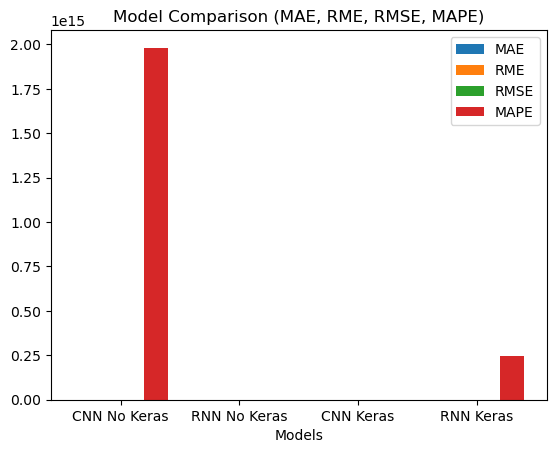

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import tkinter as tk
from tkinter import messagebox

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)                # Age of students (18-30 years old)
hours_of_study = np.random.randint(1, 10, size=n_samples)       # Hours of study per week (1-10 hours)
previous_scores = np.random.randint(50, 100, size=n_samples)    # Average previous test scores (50-100)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)  # Pass/Fail (0 or 1)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

# 2. Define input and output
X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model without Keras (TensorFlow only)
def cnn_model_without_keras(X_train, y_train, X_test):
    X_cnn_train = X_train.reshape(-1, 1, 3, 1)  # reshape for CNN
    X_cnn_test = X_test.reshape(-1, 1, 3, 1)

    cnn_weights = {
        'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),
        'dense': tf.Variable(tf.random.normal([16 * 2, 1]))
    }
    cnn_biases = {
        'conv1': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def cnn_forward(X):
        conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1, 1, 1, 1], padding='VALID')
        conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
        conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
        dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_cnn = tf.optimizers.Adam()
    loss_fn_cnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = cnn_forward(X_cnn_train)
            loss_value = loss_fn_cnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
        optimizer_cnn.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

    y_pred_cnn = cnn_forward(X_cnn_test).numpy().flatten()
    return np.round(y_pred_cnn)

# RNN Model without Keras (TensorFlow only)
def rnn_model_without_keras(X_train, y_train, X_test):
    X_rnn_train = X_train.reshape(-1, 3, 1)
    X_rnn_test = X_test.reshape(-1, 3, 1)

    rnn_weights = {
        'rnn': tf.Variable(tf.random.normal([1, 16])),
        'dense': tf.Variable(tf.random.normal([16, 1]))
    }
    rnn_biases = {
        'rnn': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def rnn_forward(X):
        rnn_outputs = []
        for t in range(3):
            rnn_input = X[:, t, :] @ rnn_weights['rnn'] + rnn_biases['rnn']
            rnn_outputs.append(tf.nn.relu(rnn_input))
        rnn_output = rnn_outputs[-1]
        dense = tf.matmul(rnn_output, rnn_weights['dense']) + rnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_rnn = tf.optimizers.Adam()
    loss_fn_rnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = rnn_forward(X_rnn_train)
            loss_value = loss_fn_rnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
        optimizer_rnn.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

    y_pred_rnn = rnn_forward(X_rnn_test).numpy().flatten()
    return np.round(y_pred_rnn)

# CNN Model with Keras
def cnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.Conv2D(16, (1, 2), activation='relu', input_shape=(1, 3, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 1, 3, 1)
    X_test = X_test.reshape(-1, 1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# RNN Model with Keras
def rnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.SimpleRNN(16, input_shape=(3, 1), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 3, 1)
    X_test = X_test.reshape(-1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# Function to calculate metrics (MAE, RME, RMSE, MAPE)
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate RME (Relative Mean Error) - Handle division by zero
    non_zero_indices = y_true != 0  # Avoid division by zero
    rme = np.mean((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rme, rmse, mape

# Function to plot MAE, RME, RMSE, MAPE comparison
def plot_comparison():
    metrics_cnn_no_keras = calculate_metrics(y_test, cnn_model_without_keras(X_train, y_train, X_test))
    metrics_rnn_no_keras = calculate_metrics(y_test, rnn_model_without_keras(X_train, y_train, X_test))
    metrics_cnn_keras = calculate_metrics(y_test, cnn_model_with_keras(X_train, y_train, X_test))
    metrics_rnn_keras = calculate_metrics(y_test, rnn_model_with_keras(X_train, y_train, X_test))

    models = ['CNN No Keras', 'RNN No Keras', 'CNN Keras', 'RNN Keras']
    mae_scores = [metrics_cnn_no_keras[0], metrics_rnn_no_keras[0], metrics_cnn_keras[0], metrics_rnn_keras[0]]
    rme_scores = [metrics_cnn_no_keras[1], metrics_rnn_no_keras[1], metrics_cnn_keras[1], metrics_rnn_keras[1]]
    rmse_scores = [metrics_cnn_no_keras[2], metrics_rnn_no_keras[2], metrics_cnn_keras[2], metrics_rnn_keras[2]]
    mape_scores = [metrics_cnn_no_keras[3], metrics_rnn_no_keras[3], metrics_cnn_keras[3], metrics_rnn_keras[3]]

    # Plot
    x = np.arange(len(models))  # label locations
    width = 0.2  # bar width

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5 * width, mae_scores, width, label='MAE')
    rects2 = ax.bar(x - 0.5 * width, rme_scores, width, label='RME')
    rects3 = ax.bar(x + 0.5 * width, rmse_scores, width, label='RMSE')
    rects4 = ax.bar(x + 1.5 * width, mape_scores, width, label='MAPE')

    # Add labels, title, etc.
    ax.set_xlabel('Models')
    ax.set_title('Model Comparison (MAE, RME, RMSE, MAPE)')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    # Show plot
    plt.show()

# Call plot function to display the comparison
plot_comparison()


C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


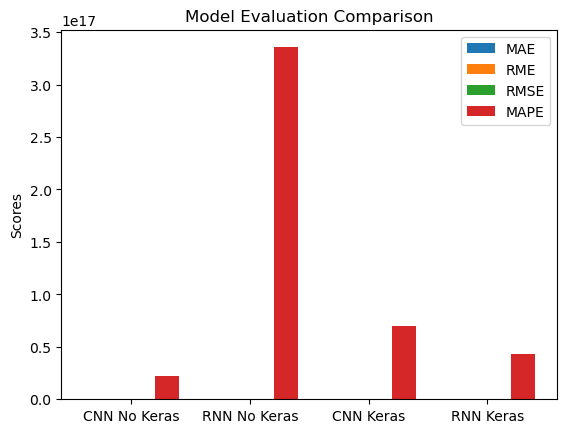

C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\84395\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


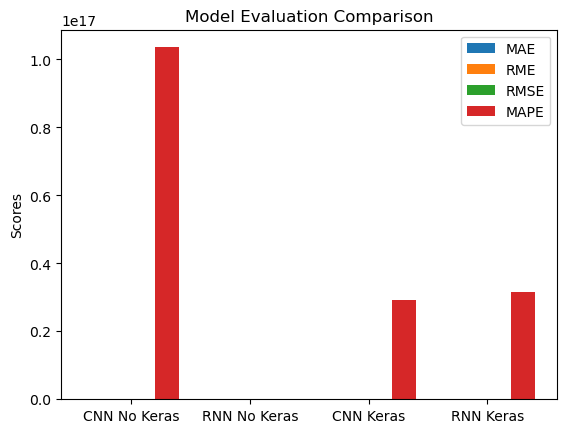

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow import keras
import tkinter as tk
from tkinter import ttk

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)                # Age of students (18-30 years old)
hours_of_study = np.random.randint(1, 10, size=n_samples)       # Hours of study per week (1-10 hours)
previous_scores = np.random.randint(50, 100, size=n_samples)    # Average previous test scores (50-100)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)  # Pass/Fail (0 or 1)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

# 2. Define input and output
X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model (using TensorFlow without Keras)
def cnn_model_without_keras(X_train, y_train, X_test):
    X_cnn_train = X_train.reshape(-1, 1, 3, 1)  # reshape for CNN
    X_cnn_test = X_test.reshape(-1, 1, 3, 1)

    cnn_weights = {
        'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),
        'dense': tf.Variable(tf.random.normal([16 * 2, 1]))
    }
    cnn_biases = {
        'conv1': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def cnn_forward(X):
        conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1, 1, 1, 1], padding='VALID')
        conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
        conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
        dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_cnn = tf.optimizers.Adam()
    loss_fn_cnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = cnn_forward(X_cnn_train)
            loss_value = loss_fn_cnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
        optimizer_cnn.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

    y_pred_cnn = cnn_forward(X_cnn_test).numpy().flatten()
    return np.round(y_pred_cnn)

# RNN Model (using TensorFlow without Keras)
def rnn_model_without_keras(X_train, y_train, X_test):
    X_rnn_train = X_train.reshape(-1, 3, 1)
    X_rnn_test = X_test.reshape(-1, 3, 1)

    rnn_weights = {
        'rnn': tf.Variable(tf.random.normal([1, 16])),
        'dense': tf.Variable(tf.random.normal([16, 1]))
    }
    rnn_biases = {
        'rnn': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def rnn_forward(X):
        rnn_outputs = []
        for t in range(3):
            rnn_input = X[:, t, :] @ rnn_weights['rnn'] + rnn_biases['rnn']
            rnn_outputs.append(tf.nn.relu(rnn_input))
        rnn_output = rnn_outputs[-1]
        dense = tf.matmul(rnn_output, rnn_weights['dense']) + rnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_rnn = tf.optimizers.Adam()
    loss_fn_rnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = rnn_forward(X_rnn_train)
            loss_value = loss_fn_rnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
        optimizer_rnn.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

    y_pred_rnn = rnn_forward(X_rnn_test).numpy().flatten()
    return np.round(y_pred_rnn)

# CNN Model using Keras
def cnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.Conv2D(16, (1, 2), activation='relu', input_shape=(1, 3, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 1, 3, 1)
    X_test = X_test.reshape(-1, 1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# RNN Model using Keras
def rnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.SimpleRNN(16, input_shape=(3, 1), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 3, 1)
    X_test = X_test.reshape(-1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# Function to calculate metrics (MAE, RME, RMSE, MAPE)
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    non_zero_indices = y_true != 0  # Avoid division by zero
    rme = np.mean((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100
    return mae, rme, rmse, mape

# Function to plot comparison of the models
def plot_comparison():
    metrics_cnn_no_keras = calculate_metrics(y_test, cnn_model_without_keras(X_train, y_train, X_test))
    metrics_rnn_no_keras = calculate_metrics(y_test, rnn_model_without_keras(X_train, y_train, X_test))
    metrics_cnn_keras = calculate_metrics(y_test, cnn_model_with_keras(X_train, y_train, X_test))
    metrics_rnn_keras = calculate_metrics(y_test, rnn_model_with_keras(X_train, y_train, X_test))

    models = ['CNN No Keras', 'RNN No Keras', 'CNN Keras', 'RNN Keras']
    mae_scores = [metrics_cnn_no_keras[0], metrics_rnn_no_keras[0], metrics_cnn_keras[0], metrics_rnn_keras[0]]
    rme_scores = [metrics_cnn_no_keras[1], metrics_rnn_no_keras[1], metrics_cnn_keras[1], metrics_rnn_keras[1]]
    rmse_scores = [metrics_cnn_no_keras[2], metrics_rnn_no_keras[2], metrics_cnn_keras[2], metrics_rnn_keras[2]]
    mape_scores = [metrics_cnn_no_keras[3], metrics_rnn_no_keras[3], metrics_cnn_keras[3], metrics_rnn_keras[3]]

    x = np.arange(len(models))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5 * width, mae_scores, width, label='MAE')
    rects2 = ax.bar(x - 0.5 * width, rme_scores, width, label='RME')
    rects3 = ax.bar(x + 0.5 * width, rmse_scores, width, label='RMSE')
    rects4 = ax.bar(x + 1.5 * width, mape_scores, width, label='MAPE')

    ax.set_ylabel('Scores')
    ax.set_title('Model Evaluation Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    plt.show()

# Main GUI setup
def predict():
    model_type = model_choice.get()
    use_keras = keras_choice.get()
    
    if model_type == 'CNN':
        if use_keras == 'Yes':
            y_pred = cnn_model_with_keras(X_train, y_train, X_test)
        else:
            y_pred = cnn_model_without_keras(X_train, y_train, X_test)
    elif model_type == 'RNN':
        if use_keras == 'Yes':
            y_pred = rnn_model_with_keras(X_train, y_train, X_test)
        else:
            y_pred = rnn_model_without_keras(X_train, y_train, X_test)
    
    # Tính toán các chỉ số đánh giá
    mae, rme, rmse, mape = calculate_metrics(y_test, y_pred)
    
    # Cập nhật nhãn kết quả
    result_var.set(f"MAE: {mae:.4f}\nRME: {rme:.4f}\nRMSE: {rmse:.4f}\nMAPE: {mape:.4f}%")

# Thiết lập GUI
root = tk.Tk()
root.title("Model Comparison GUI")
root.geometry("400x300")

# Tùy chọn mô hình
ttk.Label(root, text="Choose Model Type:").grid(column=0, row=0, padx=10, pady=10)
model_choice = ttk.Combobox(root, values=['CNN', 'RNN'])
model_choice.grid(column=1, row=0)
model_choice.current(0)

# Tùy chọn có dùng Keras hay không
ttk.Label(root, text="Use Keras:").grid(column=0, row=1, padx=10, pady=10)
keras_choice = ttk.Combobox(root, values=['Yes', 'No'])
keras_choice.grid(column=1, row=1)
keras_choice.current(0)

# Nút thực hiện dự đoán
predict_button = ttk.Button(root, text="Predict", command=predict)
predict_button.grid(column=0, row=2, columnspan=2, padx=10, pady=10)

# Nhãn hiển thị kết quả
result_var = tk.StringVar()
result_label = ttk.Label(root, textvariable=result_var, relief="sunken", width=40)
result_label.grid(column=0, row=3, columnspan=2, padx=10, pady=10)

# Nút hiển thị so sánh các mô hình
plot_button = ttk.Button(root, text="Plot Comparison", command=plot_comparison)
plot_button.grid(column=0, row=4, columnspan=2, padx=10, pady=10)

# Chạy giao diện
root.mainloop()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tkinter as tk
import tkinter.messagebox as messagebox

# Tạo dữ liệu giả lập như trong các phần trước
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)
hours_of_study = np.random.randint(1, 10, size=n_samples)
previous_scores = np.random.randint(50, 100, size=n_samples)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)

data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Định nghĩa các mô hình như trước
def cnn_model_without_keras(X_train, y_train, X_test):
    X_cnn_train = X_train.reshape(-1, 1, 3, 1)
    X_cnn_test = X_test.reshape(-1, 1, 3, 1)

    cnn_weights = {
        'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),
        'dense': tf.Variable(tf.random.normal([16 * 2, 1]))
    }
    cnn_biases = {
        'conv1': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def cnn_forward(X):
        conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1,1,1,1], padding='VALID')
        conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
        conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
        dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer = tf.optimizers.Adam()
    loss_fn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = cnn_forward(X_cnn_train)
            loss = loss_fn(y_train.reshape(-1,1).astype(float), predictions)
        gradients = tape.gradient(loss, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
        optimizer.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

    y_pred = cnn_forward(X_cnn_test).numpy().flatten()
    return np.round(y_pred)

def cnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.Conv2D(16, (1, 2), activation='relu', input_shape=(1,3,1)),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 1, 3, 1)
    X_test = X_test.reshape(-1, 1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

def rnn_model_without_keras(X_train, y_train, X_test):
    X_rnn_train = X_train.reshape(-1, 3, 1)
    X_rnn_test = X_test.reshape(-1, 3, 1)

    rnn_weights = {
        'rnn': tf.Variable(tf.random.normal([1,16])),
        'dense': tf.Variable(tf.random.normal([16,1]))
    }
    rnn_biases = {
        'rnn': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def rnn_forward(X):
        batch_size = X.shape[0]
        hidden_state = tf.zeros((batch_size, 16), dtype=tf.float32)  # Chuyển hidden_state về kiểu float32
        for t in range(3):
            x_t = X[:, t, :]
            x_t = tf.reshape(x_t, [batch_size, -1])
            x_t = tf.cast(x_t, tf.float32)  # Chuyển x_t về kiểu float32
            input_and_state = tf.concat([x_t, hidden_state], axis=1)
            hidden_state = tf.nn.relu(tf.matmul(x_t, rnn_weights['rnn']) + rnn_biases['rnn'])
        output = tf.matmul(hidden_state, rnn_weights['dense']) + rnn_biases['dense']
        output = tf.nn.sigmoid(output)
        return output


    optimizer = tf.optimizers.Adam()
    loss_fn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = rnn_forward(X_rnn_train)
            loss = loss_fn(y_train.reshape(-1,1).astype(float), predictions)
        gradients = tape.gradient(loss, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
        optimizer.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

    y_pred = rnn_forward(X_rnn_test).numpy().flatten()
    return np.round(y_pred)

def rnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.SimpleRNN(16, input_shape=(3,1), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 3, 1)
    X_test = X_test.reshape(-1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# Hàm tính các chỉ số đánh giá
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    non_zero_indices = y_true != 0
    if np.sum(non_zero_indices) == 0:
        rme = 0
    else:
        rme = np.mean((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100
    return mae, rme, rmse, mape

# Hàm thực hiện việc dự đoán dựa trên lựa chọn của người dùng và hiển thị kết quả
import tkinter.messagebox as messagebox

# Hàm thực hiện việc dự đoán dựa trên lựa chọn của người dùng và hiển thị kết quả
def predict():
    # Lấy dữ liệu từ các ô nhập
    try:
        age = int(entry_age.get())
        hours_of_study = int(entry_study.get())
        previous_test_scores = int(entry_scores.get())
    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid numerical values.")
        return
    
    # Chuẩn bị dữ liệu đầu vào cho mô hình
    input_data = np.array([[age, hours_of_study, previous_test_scores]])
    
    model_selection = model_choice.get()
    
    if model_selection == 'CNN without Keras':
        y_pred = cnn_model_without_keras(X_train, y_train, input_data)
    elif model_selection == 'CNN with Keras':
        y_pred = cnn_model_with_keras(X_train, y_train, input_data)
    elif model_selection == 'RNN without Keras':
        y_pred = rnn_model_without_keras(X_train, y_train, input_data)
    elif model_selection == 'RNN with Keras':
        y_pred = rnn_model_with_keras(X_train, y_train, input_data)
    else:
        messagebox.showwarning("Model selection", "Please select a model.")
        return
    
    # Hiển thị kết quả dự đoán trong một cửa sổ pop-up
    prediction_label = "Pass" if y_pred[0] == 1 else "Fail"
    messagebox.showinfo("Prediction Result", f"Prediction: {prediction_label}")

# Hàm để hiển thị biểu đồ so sánh các mô hình
def plot_comparison():
    metrics_cnn_no_keras = calculate_metrics(y_test, cnn_model_without_keras(X_train, y_train, X_test))
    metrics_cnn_keras = calculate_metrics(y_test, cnn_model_with_keras(X_train, y_train, X_test))
    metrics_rnn_no_keras = calculate_metrics(y_test, rnn_model_without_keras(X_train, y_train, X_test))
    metrics_rnn_keras = calculate_metrics(y_test, rnn_model_with_keras(X_train, y_train, X_test))
    
    models = ['CNN without Keras', 'CNN with Keras', 'RNN without Keras', 'RNN with Keras']
    mae_scores = [metrics_cnn_no_keras[0], metrics_cnn_keras[0], metrics_rnn_no_keras[0], metrics_rnn_keras[0]]
    rme_scores = [metrics_cnn_no_keras[1], metrics_cnn_keras[1], metrics_rnn_no_keras[1], metrics_rnn_keras[1]]
    rmse_scores = [metrics_cnn_no_keras[2], metrics_cnn_keras[2], metrics_rnn_no_keras[2], metrics_rnn_keras[2]]
    mape_scores = [metrics_cnn_no_keras[3], metrics_cnn_keras[3], metrics_rnn_no_keras[3], metrics_rnn_keras[3]]
    
    x = np.arange(len(models))
    width = 0.2
    
    fig, ax = plt.subplots(figsize=(10,6))
    rects1 = ax.bar(x - 1.5 * width, mae_scores, width, label='MAE')
    rects2 = ax.bar(x - 0.5 * width, rme_scores, width, label='RME')
    rects3 = ax.bar(x + 0.5 * width, rmse_scores, width, label='RMSE')
    rects4 = ax.bar(x + 1.5 * width, mape_scores, width, label='MAPE')
    
    ax.set_ylabel('Scores')
    ax.set_title('Model Evaluation Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Thiết lập GUI
root = tk.Tk()
root.title("Model Comparison GUI")
root.geometry("400x400")

# Các ô nhập cho Age, Hours of Study, Previous Test Scores
ttk.Label(root, text="Age:").grid(column=0, row=0, padx=10, pady=5, sticky='W')
entry_age = ttk.Entry(root)
entry_age.grid(column=1, row=0, padx=10, pady=5)

ttk.Label(root, text="Hours of Study:").grid(column=0, row=1, padx=10, pady=5, sticky='W')
entry_study = ttk.Entry(root)
entry_study.grid(column=1, row=1, padx=10, pady=5)

ttk.Label(root, text="Previous Test Scores:").grid(column=0, row=2, padx=10, pady=5, sticky='W')
entry_scores = ttk.Entry(root)
entry_scores.grid(column=1, row=2, padx=10, pady=5)

# Tùy chọn mô hình
ttk.Label(root, text="Choose Model:").grid(column=0, row=3, padx=10, pady=10, sticky='W')
model_choice = ttk.Combobox(root, values=[
    'CNN without Keras',
    'CNN with Keras',
    'RNN without Keras',
    'RNN with Keras'
])
model_choice.grid(column=1, row=3, padx=10, pady=10)
model_choice.current(0)

# Nút thực hiện dự đoán
predict_button = ttk.Button(root, text="Predict", command=predict)
predict_button.grid(column=0, row=4, columnspan=2, padx=10, pady=10)

# Nhãn hiển thị kết quả
result_var = tk.StringVar()
result_label = ttk.Label(root, textvariable=result_var, relief="sunken", width=40)
result_label.grid(column=0, row=5, columnspan=2, padx=10, pady=10)

# Nút hiển thị so sánh các mô hình
plot_button = ttk.Button(root, text="Plot Comparison", command=plot_comparison)
plot_button.grid(column=0, row=6, columnspan=2, padx=10, pady=10)

# Chạy giao diện
root.mainloop()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tkinter as tk
from tkinter import ttk
import tkinter.messagebox as messagebox

# Tạo dữ liệu giả lập
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)
hours_of_study = np.random.randint(1, 10, size=n_samples)
previous_scores = np.random.randint(50, 100, size=n_samples)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)

data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Định nghĩa các mô hình CNN và RNN như trong ví dụ trước
def cnn_model_without_keras(X_train, y_train, X_test):
    X_cnn_train = X_train.reshape(-1, 1, 3, 1)
    X_cnn_test = X_test.reshape(-1, 1, 3, 1)

    cnn_weights = {
        'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),
        'dense': tf.Variable(tf.random.normal([16 * 2, 1]))
    }
    cnn_biases = {
        'conv1': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def cnn_forward(X):
        conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1,1,1,1], padding='VALID')
        conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
        conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
        dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer = tf.optimizers.Adam()
    loss_fn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = cnn_forward(X_cnn_train)
            loss = loss_fn(y_train.reshape(-1,1).astype(float), predictions)
        gradients = tape.gradient(loss, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
        optimizer.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

    y_pred = cnn_forward(X_cnn_test).numpy().flatten()
    return np.round(y_pred)

def cnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.Conv2D(16, (1, 2), activation='relu', input_shape=(1,3,1)),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 1, 3, 1)
    X_test = X_test.reshape(-1, 1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

def rnn_model_without_keras(X_train, y_train, X_test):
    X_rnn_train = X_train.reshape(-1, 3, 1)
    X_rnn_test = X_test.reshape(-1, 3, 1)

    rnn_weights = {
        'rnn': tf.Variable(tf.random.normal([1,16])),
        'dense': tf.Variable(tf.random.normal([16,1]))
    }
    rnn_biases = {
        'rnn': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def rnn_forward(X):
        batch_size = X.shape[0]
        hidden_state = tf.zeros((batch_size, 16), dtype=tf.float32)  
        for t in range(3):
            x_t = X[:, t, :]
            x_t = tf.reshape(x_t, [batch_size, -1])
            x_t = tf.cast(x_t, tf.float32)
            input_and_state = tf.concat([x_t, hidden_state], axis=1)
            hidden_state = tf.nn.relu(tf.matmul(x_t, rnn_weights['rnn']) + rnn_biases['rnn'])
        output = tf.matmul(hidden_state, rnn_weights['dense']) + rnn_biases['dense']
        output = tf.nn.sigmoid(output)
        return output

    optimizer = tf.optimizers.Adam()
    loss_fn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = rnn_forward(X_rnn_train)
            loss = loss_fn(y_train.reshape(-1,1).astype(float), predictions)
        gradients = tape.gradient(loss, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
        optimizer.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

    y_pred = rnn_forward(X_rnn_test).numpy().flatten()
    return np.round(y_pred)

def rnn_model_with_keras(X_train, y_train, X_test):
    model = keras.Sequential([
        keras.layers.SimpleRNN(16, input_shape=(3,1), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    X_train = X_train.reshape(-1, 3, 1)
    X_test = X_test.reshape(-1, 3, 1)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return np.round(y_pred)

# Hàm tính các chỉ số đánh giá, bao gồm RME thay vì MSE
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    
    # Tính toán RME (Relative Mean Error)
    non_zero_indices = y_true != 0
    if np.sum(non_zero_indices) == 0:
        rme = 0
    else:
        rme = np.mean((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

    return mae, rme, rmse, mape


# Hàm để dự đoán kết quả
def predict():
    try:
        age = int(entry_age.get())
        hours_of_study = int(entry_study.get())
        previous_test_scores = int(entry_scores.get())
    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid numerical values.")
        return

    input_data = np.array([[age, hours_of_study, previous_test_scores]])

    model_selection = model_choice.get()

    if model_selection == 'CNN without Keras':
        y_pred = cnn_model_without_keras(X_train, y_train, input_data)
    elif model_selection == 'CNN with Keras':
        y_pred = cnn_model_with_keras(X_train, y_train, input_data)
    elif model_selection == 'RNN without Keras':
        y_pred = rnn_model_without_keras(X_train, y_train, input_data)
    elif model_selection == 'RNN with Keras':
        y_pred = rnn_model_with_keras(X_train, y_train, input_data)
    else:
        messagebox.showwarning("Model selection", "Please select a model.")
        return

    prediction_label = "Pass" if y_pred[0] == 1 else "Fail"
    messagebox.showinfo("Prediction Result", f"Prediction: {prediction_label}")

# Hàm để hiển thị biểu đồ so sánh các mô hình
# Hàm để hiển thị biểu đồ so sánh các mô hình học máy
def plot_comparison():
    # Tính toán các chỉ số cho từng mô hình
    metrics_cnn_no_keras = calculate_metrics(y_test, cnn_model_without_keras(X_train, y_train, X_test))
    metrics_cnn_keras = calculate_metrics(y_test, cnn_model_with_keras(X_train, y_train, X_test))
    metrics_rnn_no_keras = calculate_metrics(y_test, rnn_model_without_keras(X_train, y_train, X_test))
    metrics_rnn_keras = calculate_metrics(y_test, rnn_model_with_keras(X_train, y_train, X_test))

    # Các tên mô hình
    models = ['CNN without Keras', 'CNN with Keras', 'RNN without Keras', 'RNN with Keras']
    
    # Chỉ số MAE, RME, RMSE, MAPE cho từng mô hình
    mae_scores = [metrics_cnn_no_keras[0], metrics_cnn_keras[0], metrics_rnn_no_keras[0], metrics_rnn_keras[0]]
    rme_scores = [metrics_cnn_no_keras[1], metrics_cnn_keras[1], metrics_rnn_no_keras[1], metrics_rnn_keras[1]]
    rmse_scores = [metrics_cnn_no_keras[2], metrics_cnn_keras[2], metrics_rnn_no_keras[2], metrics_rnn_keras[2]]
    mape_scores = [metrics_cnn_no_keras[3], metrics_cnn_keras[3], metrics_rnn_no_keras[3], metrics_rnn_keras[3]]

    # Tạo 4 biểu đồ cột cho từng chỉ số
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    # Biểu đồ cho MAE
    ax[0, 0].bar(models, mae_scores, color='blue')
    ax[0, 0].set_title('MAE Comparison')
    ax[0, 0].set_ylabel('MAE')

    # Biểu đồ cho RME
    ax[0, 1].bar(models, rme_scores, color='orange')
    ax[0, 1].set_title('RME Comparison')
    ax[0, 1].set_ylabel('RME')

    # Biểu đồ cho RMSE
    ax[1, 0].bar(models, rmse_scores, color='green')
    ax[1, 0].set_title('RMSE Comparison')
    ax[1, 0].set_ylabel('RMSE')

    # Biểu đồ cho MAPE
    ax[1, 1].bar(models, mape_scores, color='red')
    ax[1, 1].set_title('MAPE Comparison')
    ax[1, 1].set_ylabel('MAPE (%)')

    # Tùy chỉnh bố cục để không bị chồng lấn
    plt.tight_layout()
    plt.show()

# Giao diện GUI với Tkinter
root = tk.Tk()
root.title("Prediction Interface")

# Khung nhập dữ liệu
frame = tk.Frame(root)
frame.pack(pady=10)

label_age = tk.Label(frame, text="Age")
label_age.grid(row=0, column=0)
entry_age = tk.Entry(frame)
entry_age.grid(row=0, column=1)

label_study = tk.Label(frame, text="Hours of Study")
label_study.grid(row=1, column=0)
entry_study = tk.Entry(frame)
entry_study.grid(row=1, column=1)

label_scores = tk.Label(frame, text="Previous Test Score")
label_scores.grid(row=2, column=0)
entry_scores = tk.Entry(frame)
entry_scores.grid(row=2, column=1)

# Tùy chọn mô hình
model_choice = tk.StringVar()
model_label = tk.Label(root, text="Select Model")
model_label.pack(pady=5)

model_combobox = ttk.Combobox(root, textvariable=model_choice, values=['CNN without Keras', 'CNN with Keras', 'RNN without Keras', 'RNN with Keras'])
model_combobox.pack(pady=5)

# Nút dự đoán
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.pack(pady=5)

# Nút hiển thị biểu đồ so sánh
compare_button = tk.Button(root, text="Compare Models", command=plot_comparison)
compare_button.pack(pady=5)

root.mainloop()
